# Naudojamos bibliotekos:

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [3]:
failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-house.csv"
house_duomenys = pd.read_csv(failo_kelias)

In [6]:
# Aprašome visus skaitinius stulpelius
print("Skaitinių stulpelių aprašymas:")
skaitiniu_aprasymas = house_duomenys.describe()
print(skaitiniu_aprasymas)

# Aprašome visus tekstinius ir kategorinius stulpelius
print("\nTekstinių ir kategorinių stulpelių apžvalga:")
tekstiniai_kategoriniai_stulpeliai = house_duomenys.select_dtypes(include=["object"]).columns
for stulpelis in tekstiniai_kategoriniai_stulpeliai:
    print(f"\nStulpelis: {stulpelis}")
    print(f"Unikalios reikšmės: {house_duomenys[stulpelis].nunique()}")
    print(f"Dažniausios reikšmės:\n{house_duomenys[stulpelis].value_counts().head(5)}")

Skaitinių stulpelių aprašymas:
               year    state_fips     state_cen      state_ic      district  \
count  31103.000000  31103.000000  31103.000000  31103.000000  31103.000000   
mean    1998.774973     28.758544     50.885670     37.045462      9.876636   
std       13.094926     15.211038     26.312096     21.800274      9.982075   
min     1976.000000      1.000000     11.000000      1.000000      0.000000   
25%     1988.000000     17.000000     23.000000     14.000000      3.000000   
50%     2000.000000     31.000000     51.000000     37.000000      6.000000   
75%     2010.000000     40.000000     74.000000     52.000000     13.000000   
max     2020.000000     56.000000     95.000000     82.000000     53.000000   

       candidatevotes     totalvotes     version  Populiacija_viso  \
count    31103.000000   31103.000000     31103.0      3.109000e+04   
mean     66172.462206  213197.030190  20230706.0      1.212122e+07   
std      64177.330650   76684.973611         0.

Duomenys yra pakankamai dideli ir jų yra daug todėl pakomentuosiu tik keletą svarbiausių atvejų:

# Skaitiniai stulpeliai

### 1. Kandidato balsai (candidatevotes)
Dauguma kandidatų surenka nuo kelių tūkstančių iki kelių šimtų tūkstančių balsų.
Maksimali reikšmė (1,165,136 balsų) Kalifornijos valstijoje.

In [ ]:
# Pakeičiame mokslinę notaciją į standartinę
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["candidatevotes"].describe())

count      32,452
mean       66,825
std        65,091
min             0
25%         4,324
50%        57,328
75%       112,144
max     1,165,136
Name: candidatevotes, dtype: float64


### 2. Bendras balsų skaičius (totalvotes)
Kiekvienoje valstijoje vidutiniškai rinkimuose dalyvauja apie 215,165 žmonių.
Maksimalios reikšmės nurodo didžiausias rinkimų apygardas, kuriose dalyvauja daugiau nei 2 su puse mln. rinkėjų.

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["totalvotes"].describe())

count      32,452
mean      215,165
std        82,273
min             0
25%       162,266
50%       206,983
75%       263,386
max     2,656,104
Name: totalvotes, dtype: float64


### 3. Populiacija (Populiacija_viso)
Populiacija labai skiriasi tarp skirtingų valstijų – nuo mažų, kaip Aliaska (~453 tūkst.), iki didžiausių, kaip Kalifornija (~39 mln.).
Dauguma valstijų yra vidutinio dydžio ir vidutinė populiacija jose yra (~12 mln.).

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["Populiacija_viso"].describe())

count       32,439
mean    12,159,280
std      9,680,076
min        453,690
25%      4,904,562
50%      8,917,270
75%     18,246,654
max     39,461,588
Name: Populiacija_viso, dtype: float64


### 4. Jauni vaikai (Populiacija_0_4)
Vaikų iki 5 metų amžiaus dalis atspindi bendrą gimstamumo lygį valstijose.
Kalifornija ir Teksasas turi didžiausią jaunų vaikų populiaciją kuri siekia daugiau nei 2 mln.

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["Populiacija_0_4"].describe())

count      32,439
mean      844,488
std       710,085
min        29,625
25%       342,343
50%       594,239
75%     1,173,333
max     2,561,061
Name: Populiacija_0_4, dtype: float64


### 5. Jauni suaugusieji (Populiacija_18_24)
Ši grupė yra potencialūs nauji rinkėjai, svarbūs politinėms partijoms.

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["Populiacija_18_24"].describe())

count      32,439
mean    1,227,176
std     1,006,288
min        50,139
25%       508,100
50%       877,530
75%     1,770,901
max     4,003,426
Name: Populiacija_18_24, dtype: float64


### 6. Bendras darbingumas (Bendras darbingumas)
Šis rodiklis atspindi ekonominį aktyvumą – valstijose su didesne populiacija bus didesnis darbingumas.

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["Bendras darbingumas"].describe())

count       31,924
mean     3,947,860
std      3,967,523
min         59,222
25%      1,519,346
50%      2,842,840
75%      5,050,675
max     18,024,338
Name: Bendras darbingumas, dtype: float64


### 7. Gamyba (Gamyba)
Valstijos su stipria gamybos pramone (pvz., Mičiganas) pasižymi didesniais šio stulpelio rodikliais.

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["Gamyba"].describe())

count    31,924
mean    242,486
std     183,579
min           0
25%     111,598
50%     236,797
75%     340,498
max     908,584
Name: Gamyba, dtype: float64


### 8. Pagrindinės politinė partijos
**Demokratų partija** (party - DEMOCRAT)
9,908 įrašų.
Demokratų partija dominuoja daugelyje valstijų, ypač šiaurės rytuose ir vakaruose.

**Respublikonų partija** (party - REPUBLICAN)
9,705 įrašų.
Respublikonų partija dominuoja pietinėse ir vidurio vakarų valstijose.

In [ ]:
pd.options.display.float_format = "{:,.0f}".format
print(house_duomenys["party"].describe())

count        28594
unique         477
top       DEMOCRAT
freq          9908
Name: party, dtype: object


# Tekstiniai stulpeliai

Valstija (state)
Unikalios reikšmės: 51

Duomenyse yra visos 50 valstijų ir Kolumbijos apygarda.
Niujorkas, Kalifornija ir Teksasas yra daugiausiai pasitaikančios valstijos, tai atspindi jų dydį ir politinį aktyvumą.

### Rinkimų etapas (stage)

Dažniausios reikšmės:
GEN (General elections, bendrieji rinkimai): 32,392 kartų

PRI (Primaries, pirminiai rinkimai): 60 kartų

Didžioji dalis duomenų yra iš bendrųjų rinkimų, tik keli įrašai susiję su pirminiais rinkimais.


### Partija (party)

Dažniausios reikšmės:

DEMOCRAT: 9,908 kartų

REPUBLICAN: 9,705 kartų

LIBERTARIAN: 2,769 kartų

INDEPENDENT: 1,217 kartų

CONSERVATIVE: 668 kartų

Demokratų ir Respublikonų partijos dominuoja, tačiau yra reikšmingas trečiųjų partijų atstovavimas (pvz., Liberalai, Nepriklausomi).

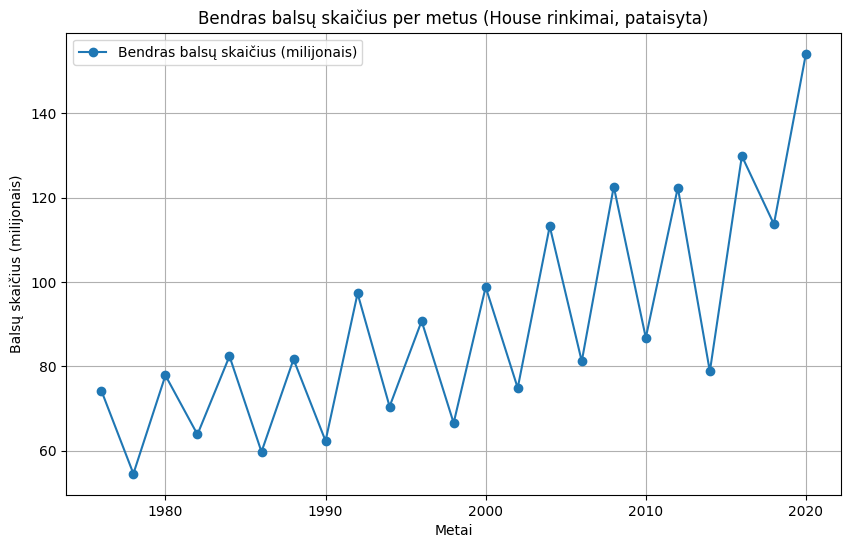

In [10]:
# Skaičiuojame bendrą balsų skaičių pagal kandidatus kiekvienais metais
balsai_pagal_kandidatus = house_duomenys.groupby(["year"])["candidatevotes"].sum()

# Konvertuojame į milijonus
balsai_mil = balsai_pagal_kandidatus / 1e6

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.plot(balsai_mil.index, balsai_mil.values, marker="o", label="Bendras balsų skaičius (milijonais)")
plt.title("Bendras balsų skaičius per metus (House rinkimai, pataisyta)")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius (milijonais)")
plt.grid()
plt.legend()
plt.show()


Bendras augimas: grafikas rodo aiškią ilgalaikę tendenciją – bendras balsų skaičius per rinkimus auga. 
Tai tikriausiai atspindi:
Gyventojų skaičiaus augimą, rinkėjų aktyvumo didėjimą 

2020 m. matome rekordinį balsų skaičių, kuris viršija 5 × 10⁸ (500 mln.). Tai labiausiai susiję su tuo, kad buvo COVID-19 pandemijos laikotarpis ir balsalapiai paštu buvo išsiūsti visiems kai kurių valstijų gyventojams.

Pastebimos periodinės mažėjimo ir augimo fazės. Tai atitinka rinkimų ciklus:
Midterm rinkimai (Tarpinės kadencijos rinkimai) dažnai turi mažesnį rinkėjų aktyvumą, palyginti su prezidento rinkimais, kurie pritraukia daugiau dėmesio.

1990-2000 laikotarpyje balsų skaičius lyg ir stabilizavosi, bet vėliau pastebimas nuoseklus augimas.
Po 2010 m. balsų skaičius tampa labiau kintantis, kas gali rodyti didėjančią politinę poliarizaciją ar specifinius demografinius pokyčius.
2020 m. anomalija:

Jei tendencija išliks, galime tikėtis, kad bendras balsų skaičius toliau augs artimiausiuose rinkimuose.

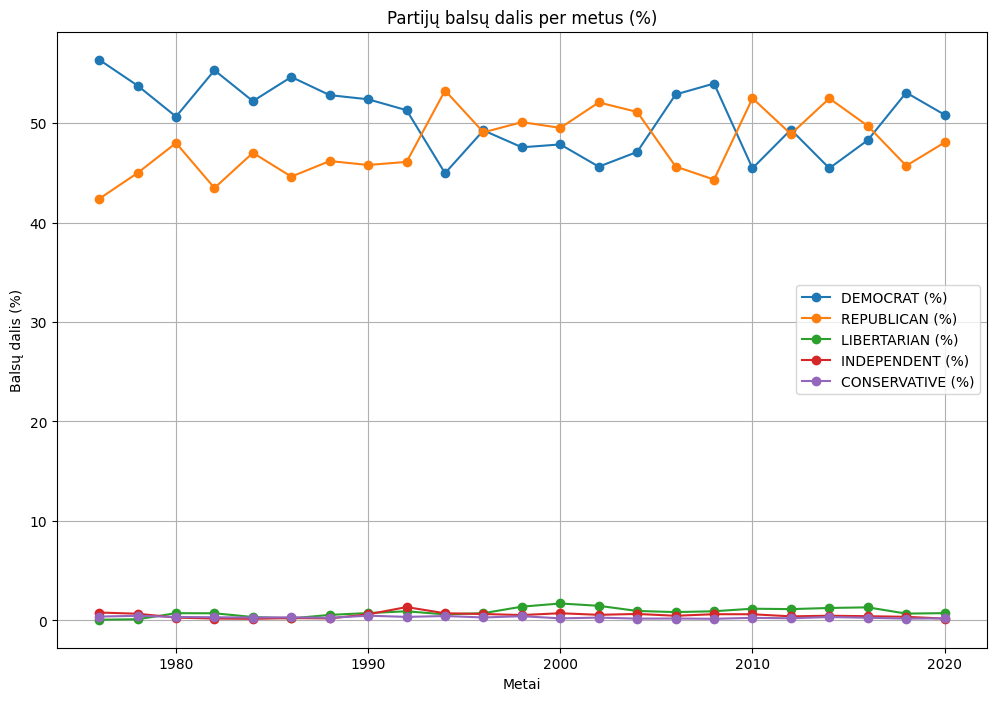

In [8]:
duomenys_filtered = house_duomenys[["year", "party", "candidatevotes", "totalvotes"]]

partijos = ["DEMOCRAT", "REPUBLICAN", "LIBERTARIAN", "INDEPENDENT", "CONSERVATIVE"]
duomenys_partijos = duomenys_filtered[duomenys_filtered["party"].isin(partijos)]

# Skaičiuojame balsų dalis pasirinktoms partijoms per metus
populiarumas = (
    duomenys_partijos.groupby(["year", "party"])["candidatevotes"]
    .sum()
    .unstack()
)
populiarumas_procentai = populiarumas.div(populiarumas.sum(axis=1), axis=0) * 100

# Populiarumo pokyčio vizualizacija pasirinktoms partijoms
plt.figure(figsize=(12, 8))
for partija in partijos:
    if partija in populiarumas_procentai.columns:
        plt.plot(populiarumas_procentai.index, populiarumas_procentai[partija], marker="o", label=f"{partija} (%)")

plt.title("Partijų balsų dalis per metus (%)")
plt.xlabel("Metai")
plt.ylabel("Balsų dalis (%)")
plt.grid()
plt.legend()
plt.show()

Liberalų partija (žalia linija) ir kitos mažesnės partijos užima labai mažą balsų dalį (dažniausiai <5 %).
Nepriklausomi kandidatai(raudona linija) ir Konservatoriai (purpurinė linija) taip pat išlieka beveik nematomi rinkimų rezultatuose.
Tai patvirtina dviejų partijų sistemos stiprumą JAV politikoje.

Stabilumas mažųjų partijų balsuose:
Liberalai ir kitos mažos partijos per visą laikotarpį nepritraukė žymiai didesnio dėmesio, tačiau jų stabilumas rodo ištikimą rinkėjų bazę.

Mažosios partijos praktiškai neturėjo jokios pastebimos įtakos.
Nors mažųjų partijų balsų dalis procentais praktiškai nekinta, jos išlieka politiškai nereikšmingos nacionaliniu lygiu.

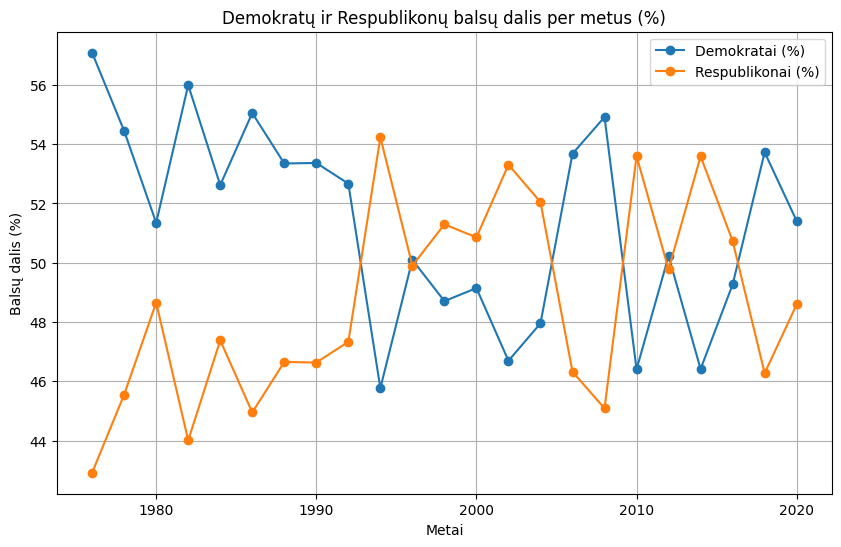

In [9]:
duomenys_filtered = house_duomenys[["year", "party", "candidatevotes", "totalvotes"]]

partijos = ["DEMOCRAT", "REPUBLICAN"]
duomenys_partijos = duomenys_filtered[duomenys_filtered["party"].isin(partijos)]

# Skaičiuojame balsų dalis Demokratų ir Respublikonų partijoms per metus
populiarumas = (
    duomenys_partijos.groupby(["year", "party"])["candidatevotes"]
    .sum()
    .unstack()
)
populiarumas_procentai = populiarumas.div(populiarumas.sum(axis=1), axis=0) * 100

# Demokratų ir Respublikonų populiarumo pokytis
plt.figure(figsize=(10, 6))
plt.plot(populiarumas_procentai.index, populiarumas_procentai["DEMOCRAT"], marker="o", label="Demokratai (%)")
plt.plot(populiarumas_procentai.index, populiarumas_procentai["REPUBLICAN"], marker="o", label="Respublikonai (%)")
plt.title("Demokratų ir Respublikonų balsų dalis per metus (%)")
plt.xlabel("Metai")
plt.ylabel("Balsų dalis (%)")
plt.grid()
plt.legend()
plt.show()

Demokratų partija (mėlyna linija) ir Respublikonų partija (oranžinė linija) kartu užima daugiau nei 90 % balsų daugumoje metų.
Jungtines valstijas atvaizduojantis grafikas atspindi dviem pagrindinėms partijoms būdingą politinės sistemos dominavimą.

Svyravimai tarp Demokratų ir Respublikonų:

Matomi reguliarūs balsų dalies pokyčiai tarp Demokratų ir Respublikonų, kurie gali atspindėti:
Midterm rinkimų efektą: Respublikonų ar Demokratų balsų dalies sumažėjimas vidurio kadencijos rinkimuose.
Svarbias politines kampanijas ar įvykius: Pavyzdžiui, rinkimuose su stipriu kandidatu viena partija gali laimėti didesnę balsų dalį.
Per paskutinius metus Demokratų balsų dalis mažėja, o Respublikonų stabilizuojasi.

1980–2000 laikotarpis:
Demokratų dominavimas, nors Respublikonai stabiliai artėjo prie jų.

2000–2020 laikotarpis:
Demokratų ir Respublikonų balsų dalis vis labiau susilygina, nors ir matomas tam tikras svyravimas.

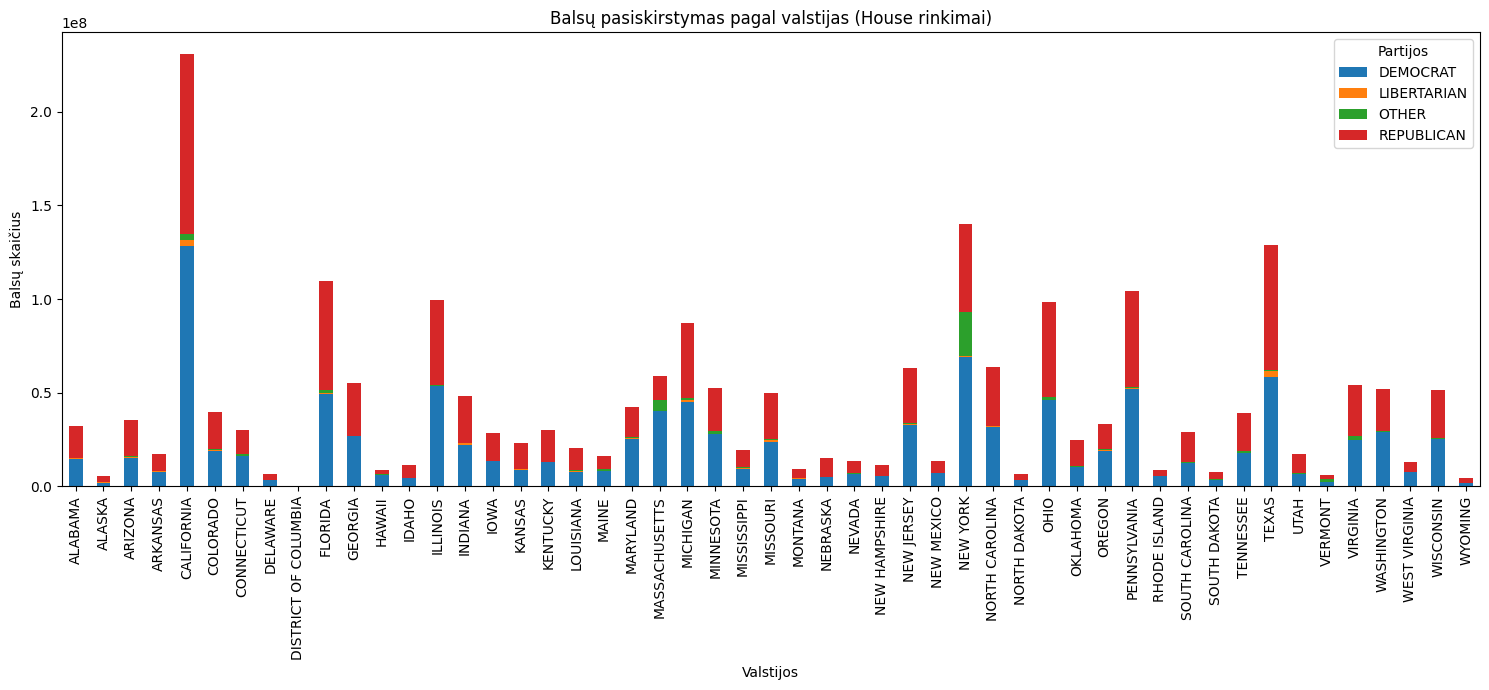

In [36]:
# House duomenų analizė
state_votes_house = house_duomenys.groupby(["state", "party_simplified"])["candidatevotes"].sum().unstack()
state_votes_house.plot(kind="bar", stacked=True, figsize=(15, 7))
plt.title("Balsų pasiskirstymas pagal valstijas (House rinkimai)")
plt.xlabel("Valstijos")
plt.ylabel("Balsų skaičius")
plt.legend(title="Partijos")
plt.tight_layout()
plt.show()

Didžiausios valstijos pagal balsus:
California, Texas, ir New York surenka daugiausia balsų dėl savo didelės populiacijos.

Demokratų partija dominuoja vakaruose ir šiaurės rytuose (California, New York).

Respublikonai stiprūs pietuose ir vidurio vakaruose (Texas, Wyoming).

Libertarian ir kitos mažesnės partijos turi nedidelę įtaką, daugiausia mažesnėse valstijose.

Mažos valstijos (Vermont, Wyoming) turi mažesnius balsų skaičius, o didelės (California, Texas) surenka daugiausiai balsų.

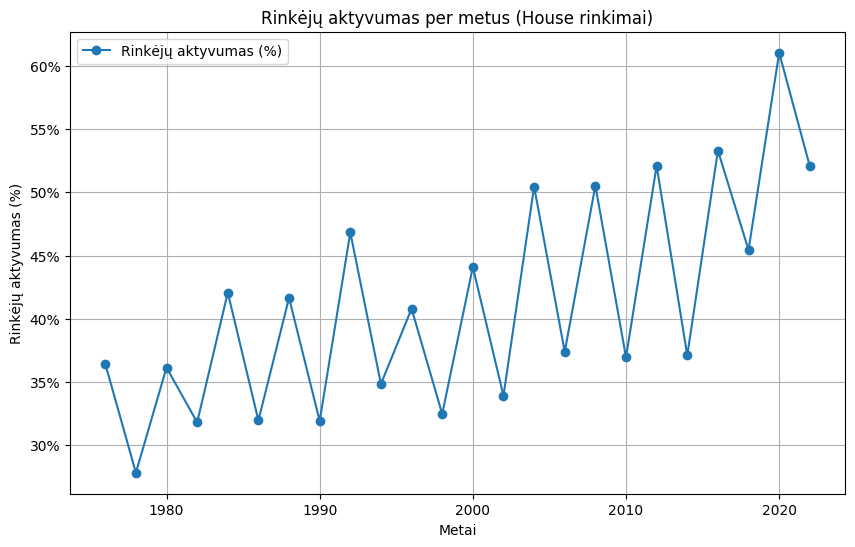

In [54]:
# Patikriname, ar "Populiacija_viso" reikšmės yra prasmingos
house_duomenys = house_duomenys[house_duomenys["Populiacija_viso"] > 0]

# Apskaičiuojame rinkėjų aktyvumą
house_duomenys["rinkejai_aktyvumas"] = house_duomenys["totalvotes"] / house_duomenys["Populiacija_viso"]

# Grupavimas pagal metus
rinkejai_aktyvumas_per_metus = house_duomenys.groupby("year")["rinkejai_aktyvumas"].mean()

plt.figure(figsize=(10, 6))
plt.plot(rinkejai_aktyvumas_per_metus.index, rinkejai_aktyvumas_per_metus.values * 100, marker="o", label="Rinkėjų aktyvumas (%)")
plt.title("Rinkėjų aktyvumas per metus (House rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Rinkėjų aktyvumas (%)")
plt.grid()
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=10, decimals=0))
plt.show()

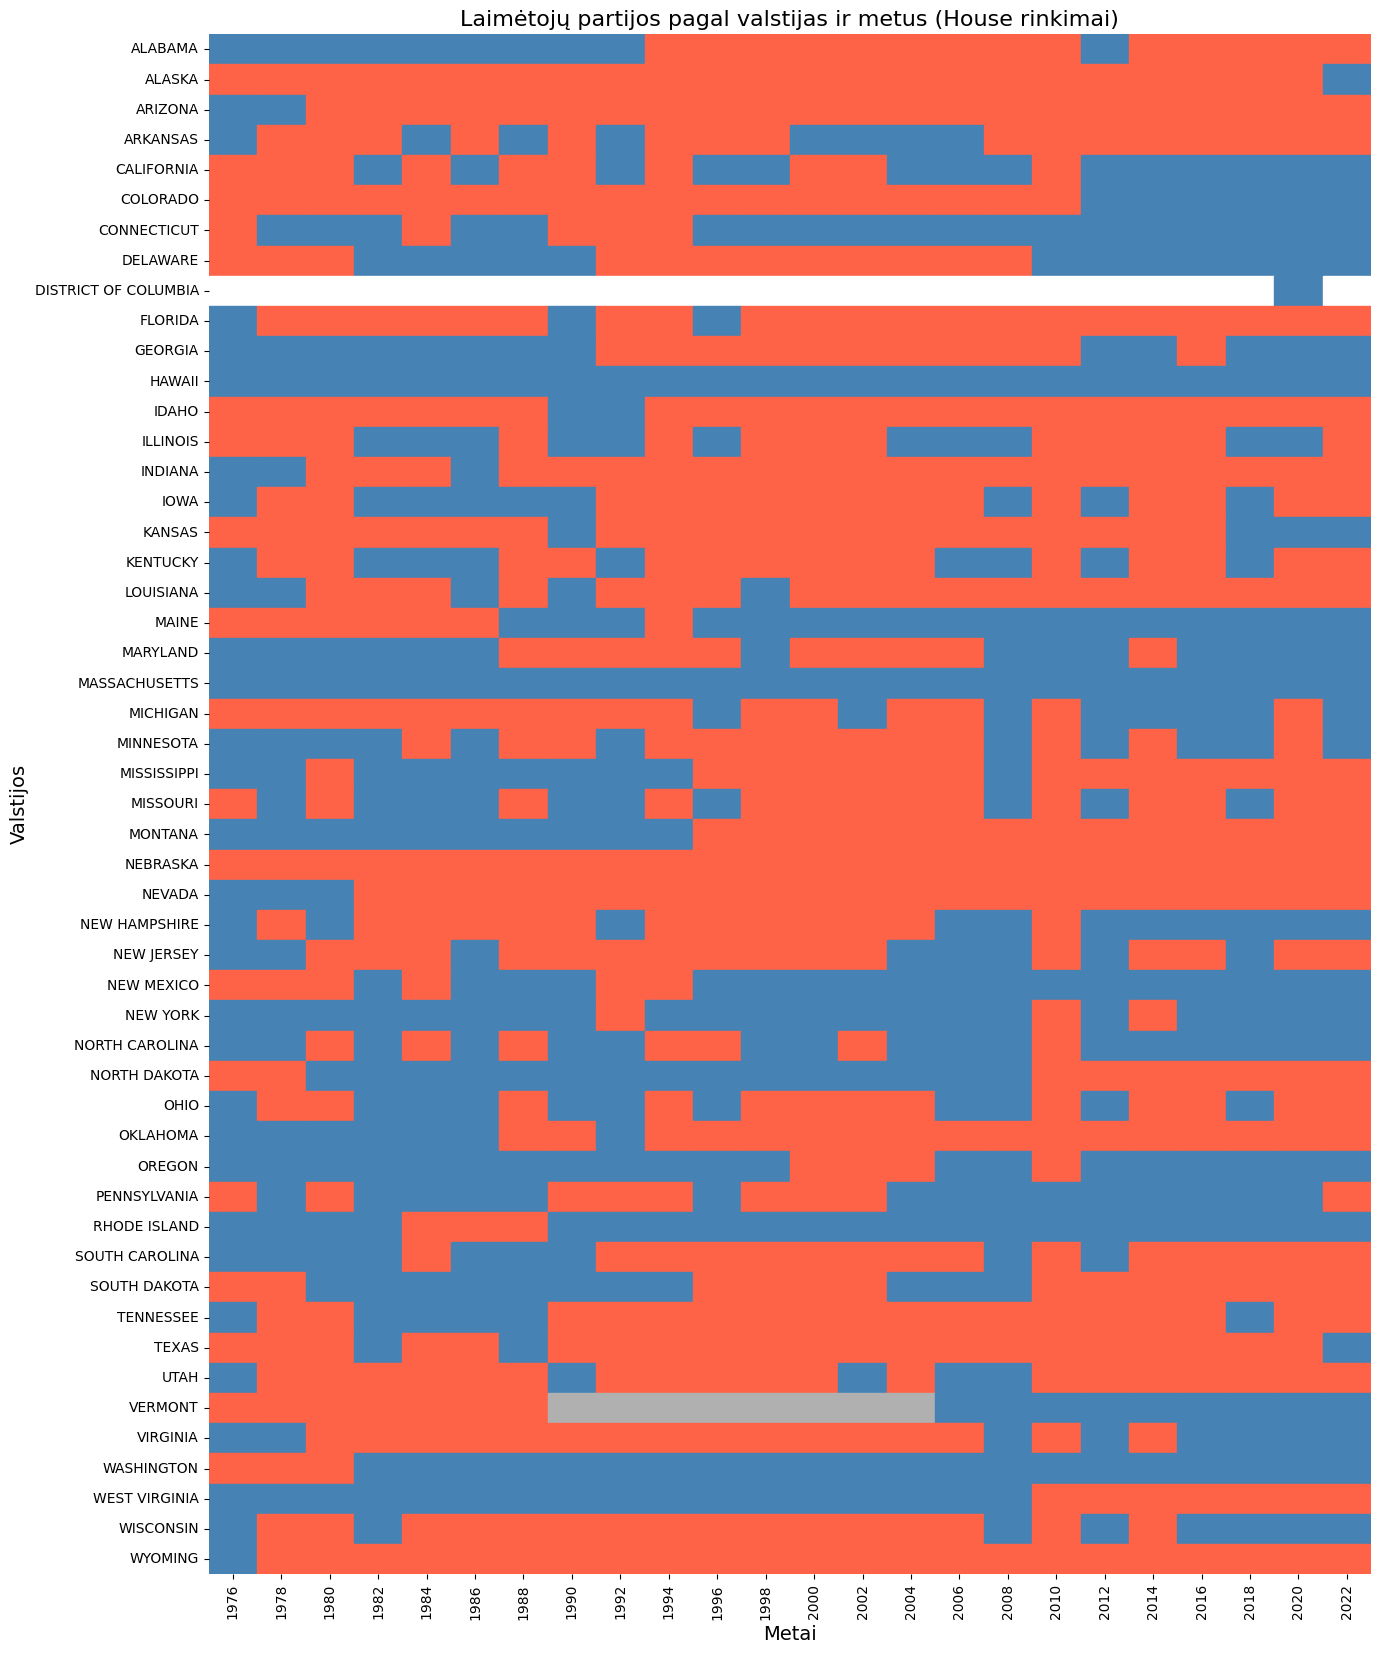

In [6]:
# House Heatmap: Winners by state and year based on most votes
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure required columns exist in the dataset
if "candidatevotes" not in house_duomenys.columns:
    print("The dataset does not contain 'candidatevotes'. Please ensure it's included.")
else:
    # Determine the winner by state and year based on most votes
    house_winners = house_duomenys.loc[
        house_duomenys.groupby(["state", "year"])["candidatevotes"].idxmax()
    ][["state", "year", "party_simplified"]]

    # Create a pivot table for the heatmap
    heatmap_data_house = house_winners.pivot(index="state", columns="year", values="party_simplified")

    # Party colors for heatmap
    party_colors = {
        "DEMOCRAT": "#4682B4",      # Brighter blue
        "REPUBLICAN": "#FF6347",    # Brighter red
        "OTHER": "#B0B0B0",         # Gray for others
        None: "white"               # White for missing data
    }

    # Map colors for each party
    heatmap_colors_house = heatmap_data_house.apply(lambda row: row.map(lambda x: party_colors.get(x, "white")), axis=1)
    rgb_heatmap_house = heatmap_colors_house.apply(lambda row: row.map(lambda x: mcolors.to_rgb(x)), axis=1)

    # Plotting the heatmap
    fig, ax = plt.subplots(figsize=(15, 20))
    sns.heatmap(
        heatmap_data_house.isnull() * 0,
        cmap=mcolors.ListedColormap(["white"]),
        cbar=False,
        linewidths=0.5,
        linecolor="lightgray",
        ax=ax
    )

    for y in range(rgb_heatmap_house.shape[0]):
        for x in range(rgb_heatmap_house.shape[1]):
            color = rgb_heatmap_house.iloc[y, x]
            ax.add_patch(plt.Rectangle((x, y), 1, 1, color=color))

    # Titles and labels
    plt.title("Laimėtojų partijos pagal valstijas ir metus (House rinkimai)", fontsize=16)
    plt.xlabel("Metai", fontsize=14)
    plt.ylabel("Valstijos", fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()


Šilumos žemėlapis rodo, kurios partijos (Demokratų, Respublikonų ar kitos) laimėjo House rinkimus pagal valstijas.

Mėlyna: Demokratų laimėtos valstijos.

Raudona: Respublikonų laimėtos valstijos.

Pilka: Kitos partijos.

Balta: Trūkstami duomenys.

Regioniniai skirtumai:
Pietinės valstijos (pvz., Texas, Alabama) dominuoja Respublikonai.

Šiaurės rytų ir vakarinės valstijos (pvz., New York, California) - Demokratai.

„Swing states“:
Florida, Pennsylvania ir Wisconsin dažnai keičia dominuojančią partiją.

Kai kurios valstijos, pvz., Virginia ir Colorado, vėliau perėjo nuo Respublikonų prie Demokratų.

Grafikas iliustruoja regioninius politinius skirtumus ir jų kaitą per laiką, išryškindamas „swing states“ ir politines tvirtoves.